In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
HR_Data = pd.read_csv("HR_Employee_Attrition-1.csv")

In [3]:
HR_Data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
HR_Data.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
HR_Data.shape

(2940, 35)

In [6]:
HR_Data.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Checking the unique value of dataset
HR_Data.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
# Finding_categorical_dataset  
categorical = [var for var in HR_Data.columns if HR_Data[var].dtypes == 'O']
print(categorical)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [9]:
HR_Data[categorical].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [10]:
for var in categorical:
    print(HR_Data[var].value_counts())

No     2466
Yes     474
Name: Attrition, dtype: int64
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
Male      1764
Female    1176
Name: Gender, dtype: int64
Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64
Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64
Y    2940
Name: Over18, dtype: int64
No     2108
Yes     

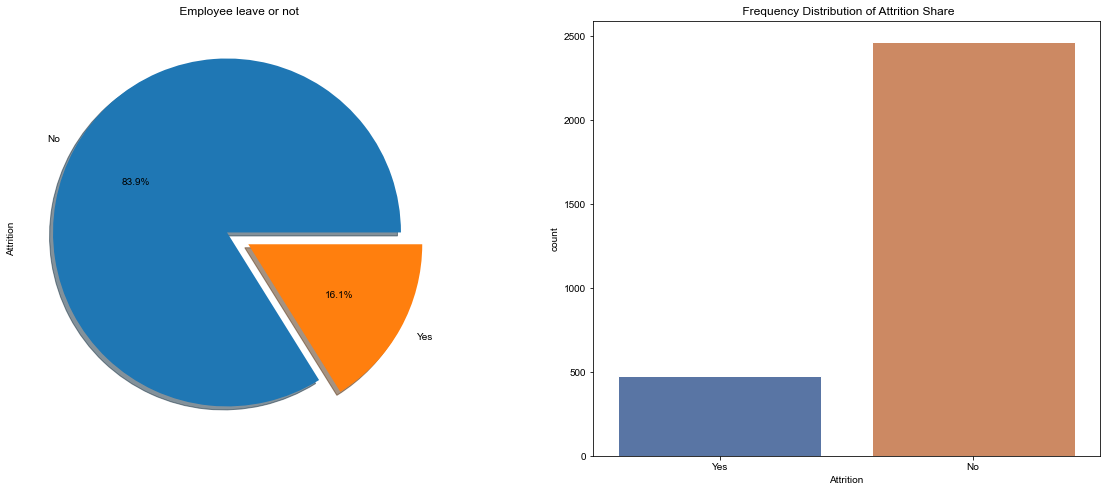

In [11]:
#Using Piechart and sns for graphical representation of data

Figure,ax = plt.subplots(1,2, figsize=(20,8))
ax[0] = HR_Data['Attrition'].value_counts(). plot.pie(explode=[0.07,0.07], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title(' Employee leave or not')

sns.set_theme(style='darkgrid')
ax[1] = sns.countplot(x=HR_Data['Attrition'], data=HR_Data)
ax[1].set_title(" Frequency Distribution of Attrition Share")
plt.show()

Text(0.5, 1.0, 'Relation of Department of Employee w.r.t to Attrition data')

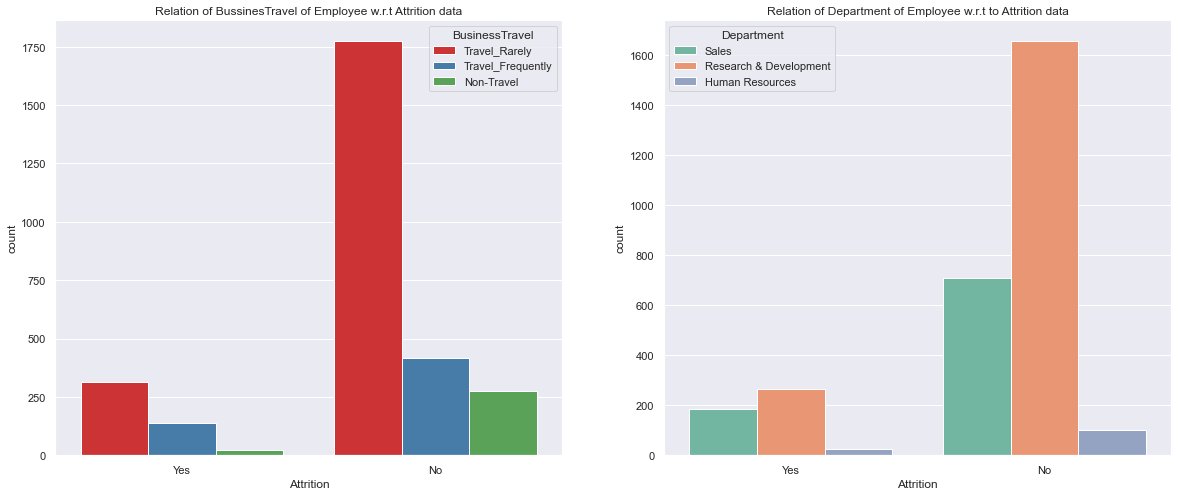

In [12]:
figure,ax = plt.subplots(1,2, figsize=(20,8))
ax[0] = sns.countplot(x = 'Attrition', hue='BusinessTravel', data=HR_Data, ax=ax[0], palette='Set1')
ax[0].set_title("Relation of BussinesTravel of Employee w.r.t Attrition data") 

ax[1] = sns.countplot(x = 'Attrition', hue='Department', data=HR_Data, palette = 'Set2')
ax[1].set_title("Relation of Department of Employee w.r.t to Attrition data") 

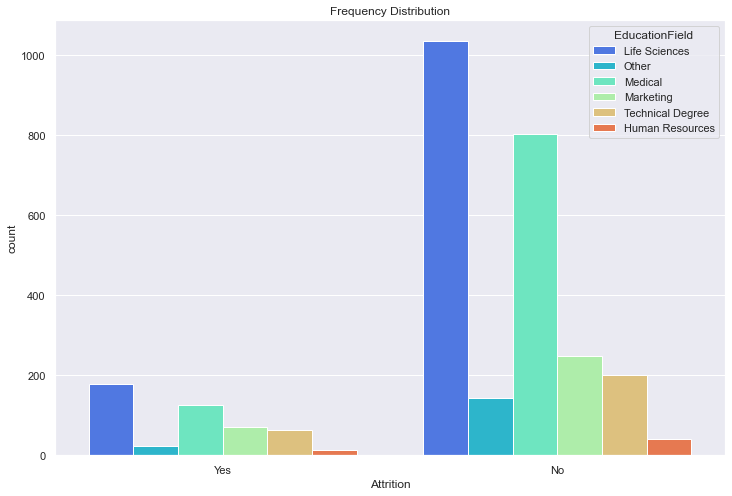

In [13]:
#frequency distribution of Education field w.r.t target columns

f,ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='Attrition', hue='EducationField', data=HR_Data, palette='rainbow')
ax.set_title('Frequency Distribution')
plt.show()

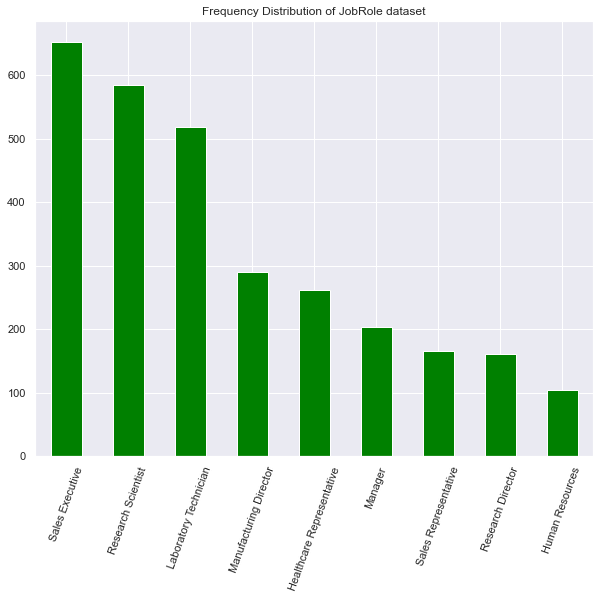

In [14]:
#JobRole Distribution 

f, ax = plt.subplots(figsize=(10,8))
ax = HR_Data['JobRole'].value_counts().plot(kind='bar',color='green')
ax.set_title("Frequency Distribution of JobRole dataset")
ax.set_xticklabels(HR_Data['JobRole'].value_counts().index, rotation=70)
plt.show()

Text(0.5, 1.0, 'Age distribution for Two case')

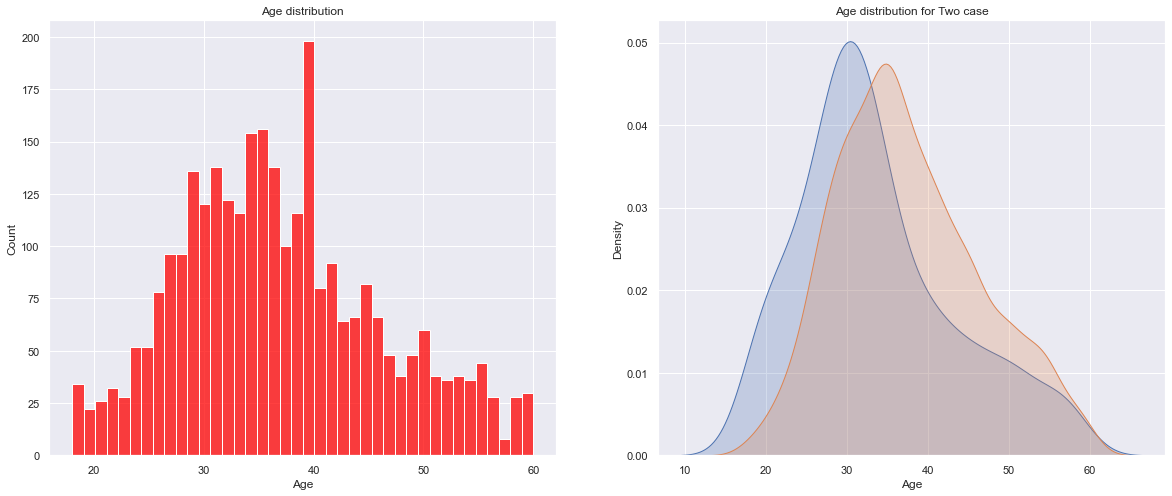

In [15]:
#Age distribution plot

fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0] = sns.histplot(HR_Data['Age'], color='red', bins=40, ax=ax[0])
ax[0].set_title("Age distribution")

ax[1] = sns.kdeplot(HR_Data['Age'].loc[HR_Data['Attrition'] == 'Yes'], 
                   shade =True, label ="Resign").set_xlabel('Age')
ax[1] = sns.kdeplot(HR_Data['Age'].loc[HR_Data['Attrition'] == 'No'], 
                   shade =True, label =" Not Resign")
ax[1].set_title('Age distribution for Two case')

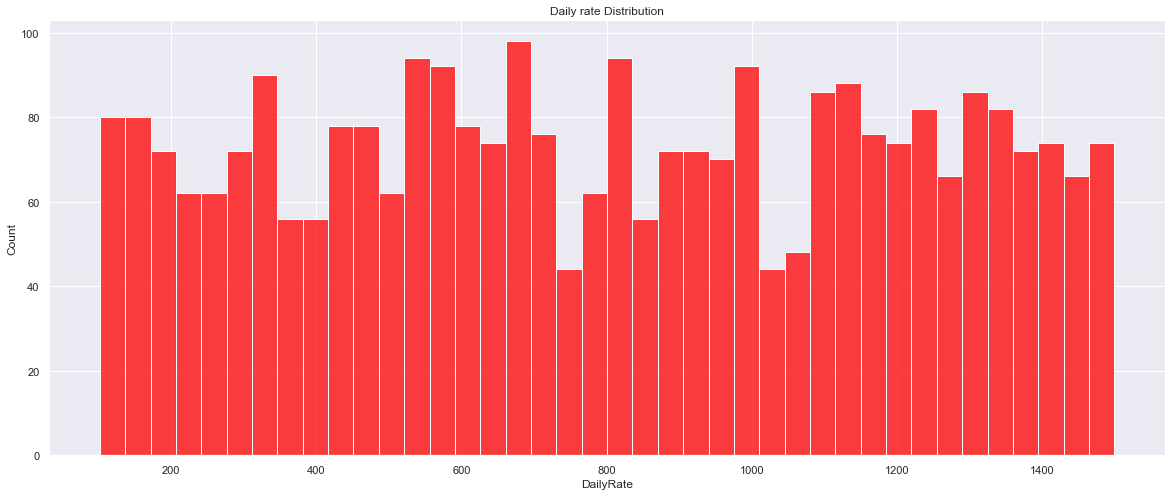

In [16]:
# Histogram plot of Daily rate Distribution

f,ax = plt.subplots(figsize=(20,8))
ax = sns.histplot(HR_Data['DailyRate'], color='red', bins=40).set_title('Daily rate Distribution')

In [17]:
x = HR_Data.drop(['Attrition'], axis=1)
y = HR_Data['Attrition']

In [18]:
#creating training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2352, 34) (588, 34) (2352,) (588,)


In [20]:
#importing category_encoders for converting categorical features

Encoder = ce.OrdinalEncoder(cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'])
X_train = Encoder.fit_transform(X_train)
X_test = Encoder.fit_transform(X_test)

In [21]:
print(X_train[0:5])

      EmployeeNumber  Age  BusinessTravel  DailyRate  Department  \
456              457   31               1        688           1   
462              463   34               1        258           1   
2174            2175   35               1        882           1   
2669            2670   36               1       1351           2   
381              382   30               1        202           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
456                  7          3               1              1   
462                 21          4               1              1   
2174                 3          4               1              1   
2669                26          4               1              1   
381                  2          1               2              1   

      EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
456                         3  ...                         3             80   
462                     

In [23]:
#checking the numerical dataset and its shape
Numerical = [var for var in HR_Data.columns if HR_Data[var].dtypes != 'O']
print(Numerical)

['EmployeeNumber', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [24]:
HR_Data[Numerical].shape

(2940, 26)

In [25]:
#Applying Robust Scaler to the data for scaling in one form of data
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [26]:
#Finally Predicting the data and accuracy score
randomforest = RandomForestClassifier()
randomforest.fit(X_train, Y_train)
y_pred = randomforest.predict(X_test)

In [27]:
score = accuracy_score(Y_test, y_pred)
print('The accuracy is',np.abs(score)*100)

The accuracy is 94.21768707482994
